#**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

#**Curso: TC4034 - Análisis de grandes volúmenes de datos**

#Tecnológico de Monterrey

#**Semana 6**

#Avance de proyecto 2: Sistema de Recomendación

#**Equipo 20**

#   Zmaltzin Paola Godínez Juárez - A01794538

#   Julio César Mestas Delgado    - A01794827

# Parte 2: Trabajando con el problema de arranque en frio de filtrado basado en contenido (Content-Based Filtering)

El `filtrado colaborativo` se basa en las interacciones del usuario con los items (user-item) dentro de una matriz de utilidad. El problema reside en que los nuevos usuarios o los elementos que no cuenten con interacciones registradas van a ser ignoradas por el sistema de recomendacion. A esto se le conoce como el problema de "Arranque en frio". El filtrado basado en contenido es una manera de atacar este problema al generar recomendaciones en interacciones usuario-item.

En el siguiente ejercicio, generaremos recomendaciones tipo item-item utilizando filtrado basado en contenido.

### Paso 1: Importar las librerias necesarias

Se utiizaran los siguientes paquetes de Python:

- [numpy](https://numpy.org/): para calculos cientificos
- [pandas](https://pandas.pydata.org/): para manipulacion de dato
- [scikit-learn](https://scikit-learn.org/stable/): para funciones de machine learning
- [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/): para visualizacion de datos

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357249 sha256=ec693886e8eae1b60c95e5210cf6d0db5a61586b5cc4bfa9568cfff28ca09525
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

### Paso 2: Cargando los datos

Exploremos el dataset para conocer su estructura y las propiedades con las que podemos trabajar.

In [3]:
movies = pd.read_csv("/content/data/Netflix_Dataset_Movie.csv")
ratings = pd.read_csv("/content/data/Netflix_Dataset_Rating_v2.csv")

In [4]:
netflix = ratings.merge(movies[['Movie_ID', 'Title', 'Year']])
netflix.head()

,User_ID,Rating,Movie_ID,Title,Year
0,712664,5,3,Character,1997
1,1331154,4,3,Character,1997
2,2632461,3,3,Character,1997
3,44937,5,3,Character,1997
4,656399,4,3,Character,1997


Podemos ver que el dataset cuenta con el id de la pelicula, el titulo, el identificador del usuario, el rating y el año

## Paso 3: Exploracion de los Datos



#### Calculemos cuantos generos de peliculas contiene el dataset?

Al utilizar la funcion de conteo de Python podemos crear un diccionario que contenga el conteo de frecuencias para cada genero en el dataset.

In [5]:
from collections import Counter

contador_peliculas = Counter(title for title in netflix['Title'])
print(f"Existen {len(contador_peliculas)} nombres de películas.")
contador_peliculas

Existen 91 nombres de películas.


Counter({'Character': 1524,
         'What the #$*! Do We Know!?': 9379,
         'Screamers': 2517,
         '7 Seconds': 4165,
         'Immortal Beloved': 9419,
         'Never Die Alone': 4262,
         'Lilo and Stitch': 32397,
         "Something's Gotta Give": 77502,
         "ABC Primetime: Mel Gibson's The Passion of the Christ": 1629,
         'Aqua Teen Hunger Force: Vol. 1': 5314,
         'Spitfire Grill': 7188,
         'The Love Letter': 2313,
         'Rudolph the Red-Nosed Reindeer': 5671,
         'The Bad and the Beautiful': 2058,
         'Justice League': 3049,
         'The Weather Underground': 3550,
         'Jade': 2126,
         'Carandiru': 1249,
         'Richard III': 3124,
         'Dragonheart': 16116,
         'Invader Zim': 1617,
         'I Love Lucy: Season 2': 2656,
         'Congo': 12571,
         'Jingle All the Way': 4294,
         'The Killing': 2834,
         'Silkwood': 16704,
         'The Powerpuff Girls Movie': 2318,
         'Mostly Martha

Existen 91 diferentes títulos de peliculas.


#### Cuales son las peliculas mas comunes?

Utilizaremos el metodo mas comun de `Counter` que es `most_common()` para obtener el listado de generos con asociados a la mayor cantidad de peliculas.

In [6]:
print("Top 10 de peliculas: \n", contador_peliculas.most_common(10))

Top 10 de peliculas: 
 [("Something's Gotta Give", 77502), ('X2: X-Men United', 73684), ('Reservoir Dogs', 65466), ('Taking Lives', 52920), ("Bridget Jones's Diary", 46910), ('The Game', 33906), ('North by Northwest', 32928), ('Harold and Kumar Go to White Castle', 32583), ('Lilo and Stitch', 32397), ('The Deer Hunter', 29692)]


En el Top 5 de peliculas encontramos: `Something's Gotta Give`, `'X2: X-Men United`, `Reservoir Dogs`, `Taking Lives` y `Bridget Jones's Diary`.

Utilizemos barplot para visualizar esta informacion.

<ipython-input-7-993033b41387>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='count', data=movie_counts_df, palette='crest')


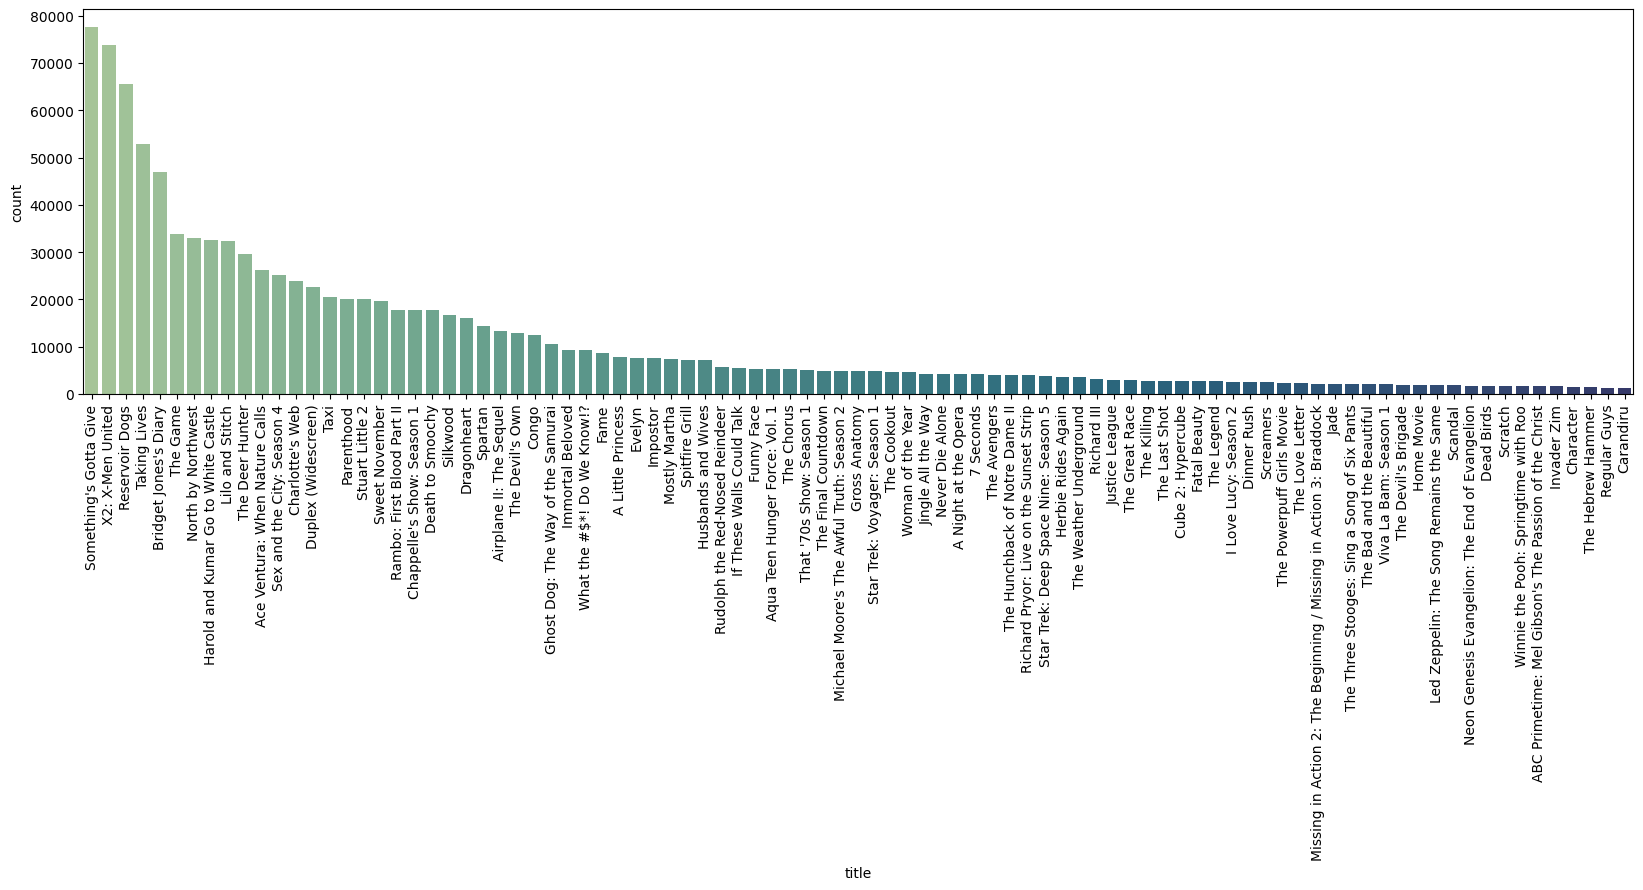

In [7]:
movie_counts_df = pd.DataFrame([contador_peliculas]).T.reset_index()
movie_counts_df.columns = ['title', 'count']
movie_counts_df = movie_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x='title', y='count', data=movie_counts_df, palette='crest')
plt.xticks(rotation=90)
plt.show()

La grafica nos confirma lo que descubrimos anteriormente, `Something's Gotta Give` y `X2: X-Men United` son los generos mas populares mientras que los `The Hebrew Hammer`, `Regular Guys`, and `Carandiru` son los menos populares.

#### Cuantos año distintos estan contenidos en nuestro dataset?


In [8]:
unique_years = netflix['Year'].nunique()
print(f"Total de años distintos en nuestro dataset: {unique_years}")

Total de años distintos en nuestro dataset: 34


Con este calculo rapido, nos percatamos que contamos con mas de 34 años en nuestro dataset. Lo que podemos hacer ahora es dividir nuestros datos en decadas para tener una idea en general de cuando fueron lanzadas las peliculas de nuestro dataset.

#### Cual fue la decada mas popular para estrenar una pelicula?



Ahora limpiemos nuestro dataset al eliminar todas las peliculas que contengan un `null` en el año.

In [9]:
netflix = netflix[~netflix['Year'].isnull()]
print(f"Total de peliculas despues de eliminar aquellas con null en el año:: {netflix['Movie_ID'].nunique()}")


Total de peliculas despues de eliminar aquellas con null en el año:: 91


Esto nos dice que no se eliminaron peliculas de manera que todas contaba con el año de lanzamiento:

Existen dos formas de calcular la decada de un año:

1. convertir el año a string y remplazar el ultimo digito con un 0

2. redondear el año al decimo (10) proximo

In [10]:
x = 1995

def calcular_decada(year):
    year = str(year)
    decade_prefix = year[0:3] # obtener los primeros 3 digitos de un año
    decade = f'{decade_prefix}0' # añadir un 0 al final
    return int(decade)

calcular_decada(x)

1990

In [11]:
def redondear(year):
    return year - (year%10)

redondear(x)

1990

Ambas funciones `calcular_decada()` y `redondear()` cumplen con el objetivo de identificar la decada de un año.

Podemos aplicar cualquiera de ellas a todos los años de nuestro dataset `netflix` y al mismo tiempo crearemos una columna llamada `Decade`.


In [12]:
netflix['Decade'] = netflix['Year'].apply(redondear)
netflix.head()

,User_ID,Rating,Movie_ID,Title,Year,Decade
0,712664,5,3,Character,1997,1990
1,1331154,4,3,Character,1997,1990
2,2632461,3,3,Character,1997,1990
3,44937,5,3,Character,1997,1990
4,656399,4,3,Character,1997,1990


### Paso 4: Transformando los datos

Para construir un sistema de recomendacion con filtrado colaborativo se utilizaran el método básico de factorización matricial utilizando el método de descomposición de valores singulares y como método avanzado el método .

Primeramente se creará una matriz con el identificador del usuario, el título de la película y los ratings. Esta matriz será utilizada en el algoritmo avanzado de recomendación seleccionado.


In [13]:
df_p = pd.pivot_table(netflix, values="Rating", index="User_ID", columns="Movie_ID")
df_p

Movie_ID,3,8,16,17,18,26,28,30,32,33,...,273,275,281,283,285,289,290,295,297,299
User_ID,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,4.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,4.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,4.0,5.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2649378,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0
2649388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizando la estructura de los matriz:

## Step 5: Construyendo un sistema de recomendacion de filtrado colaborativo utilizando Similitud Coseno - Algoritmo Básico

Para construir este sistema de recomendacion item-item utilizaremos una metrica llamada similitud coseno `cosine similarity`.

La similitud Coseno se basa en el coseno del angulo entre dos vectores (c.e., $A$ y $B$). Entre mas pequeño es el angulo, mayor es la similitud entre los vectores, y se calcula de la siguiente forma:

$$\cos(\theta) = \frac{A\cdot B}{||A|| ||B||}$$

En este ejercicio, utilizaremos la funcion de scikit-learn de `cosine_similarity` para generar la matriz de similitud de tipo $(n_{\text{movies}}, n_{\text{movies}})$. Esta matriz nos permitira extraer peliculas que sean parecidas a nuestra pelicula de interes.

Este método requiere que la matriz generada a partir del pivote tenga la celda vacías con valores de 0

In [14]:
uim = netflix.pivot(index='User_ID', columns='Title', values='Rating').fillna(0)
uim.head()

Title,7 Seconds,A Little Princess,A Night at the Opera,ABC Primetime: Mel Gibson's The Passion of the Christ,Ace Ventura: When Nature Calls,Airplane II: The Sequel,Aqua Teen Hunger Force: Vol. 1,Bridget Jones's Diary,Carandiru,Chappelle's Show: Season 1,...,The Legend,The Love Letter,The Powerpuff Girls Movie,The Three Stooges: Sing a Song of Six Pants,The Weather Underground,Viva La Bam: Season 1,What the #$*! Do We Know!?,Winnie the Pooh: Springtime with Roo,Woman of the Year,X2: X-Men United
User_ID,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


Este método de recomendación buscará a los usuarios más afines a nuestro usuario target

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def SimilarUsers(user, uim):
    similarity = []
    for i,row in enumerate(uim.values):
        cos = cosine_similarity(user, row.reshape(1, -1))[0][0]
        similarity.append([i, cos])
    temp = pd.DataFrame(similarity, columns=['userId', 'similarity'])
    temp = temp.sort_values(by=['similarity'], ascending=False).copy()
    similar_users = list(temp['userId'].values)
    similarities = list(temp['similarity'].values)

    return (similar_users, similarities)

En este caso probamos con un usuario en particular

In [16]:
user = uim.iloc[0].values.reshape(1, -1)
temp = SimilarUsers(user, uim)

Para encontrar los 10 usuarios más similares a sus gustos

In [17]:
temp[0][0:10]

[0, 19832, 77903, 49302, 115271, 57734, 91597, 105577, 76293, 140791]

Y a continuación se despliegan el coseno de similaridad obtenido respectivamente para cada uno de los usuarios

In [18]:
# The cosine similarity obtained respectively for that users are:
temp[1][0:10]

[1.0,
 0.8461980479554632,
 0.8402674962419061,
 0.8391358940158576,
 0.8326910724800534,
 0.8269317890951973,
 0.8202764993302779,
 0.8140806303599617,
 0.8139319640060197,
 0.8139319640060196]

## Step 6: Construyendo un sistema de recomendacion de filtrado colaborativo utilizando factorización matricial - Algoritmo Avanzado

La descomposición de valores singulares (SVD) es un método colaborativo de filtrado de sugerencias de películas. El objetivo de la implementación del código es proporcionar a los consumidores recomendaciones de películas basadas en las propiedades latentes de las matrices elemento-usuario. Está organizado como una matriz, donde cada fila representa un usuario y cada columna representa un objeto. Las calificaciones que los usuarios otorgan a los elementos son los constituyentes de esta matriz. La descomposición en valores singulares se utiliza para factorizar esta matriz. A partir de la factorización de una matriz de alto nivel (calificación usuario-artículo), se determinan los factores de las matrices.

Las métricas a utilizar para evaluar el desempeño son: RMSE, MAE, FIT TIME y TEST TIME.


In [19]:
f = ["count", "mean"]

df_movie_summary = netflix.groupby("Movie_ID")["Rating"].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary["count"].quantile(0.7), 0)
drop_movie_list = df_movie_summary[df_movie_summary["count"] < movie_benchmark].index

En la siguiente sección se evalua lo que en el pasado el usuario 305344 califico positivamente:

In [20]:
df_305344 = netflix[(netflix["User_ID"] == 305344) & (netflix["Rating"] == 5)]
df_305344 = df_305344.set_index("Movie_ID")
df_305344.head()

,User_ID,Rating,Title,Year,Decade
Movie_ID,,,,,
83,305344,5,Silkwood,1983,1980
199,305344,5,The Deer Hunter,1978,1970
208,305344,5,The Three Stooges: Sing a Song of Six Pants,1947,1940
238,305344,5,Led Zeppelin: The Song Remains the Same,1976,1970


Para llevar a cabo la evaluación de los modelos se utilizan las métricas de "RMSE" y "MAE". También son estimados durante la validación cruzada el Fit-time y Test-Time.

In [21]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import time
import warnings

warnings.filterwarnings("ignore")

t0 = time.time()

reader = Reader()
data = Dataset.load_from_df(netflix[["User_ID", "Movie_ID", "Rating"]][:], reader)
svd = SVD()
cross_validate(svd, data, measures=["RMSE", "MAE"], verbose=True)

train_time = round(time.time() - t0, 3)
print("\nTime Taken For Running the Algorithm --> ", train_time)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9627  0.9584  0.9632  0.9596  0.9591  0.9606  0.0019  
MAE (testset)     0.7542  0.7510  0.7532  0.7522  0.7514  0.7524  0.0012  
Fit time          18.05   19.63   23.25   26.86   25.36   22.63   3.34    
Test time         2.69    2.05    2.29    4.04    2.25    2.66    0.72    

Time Taken For Running the Algorithm -->  149.338


Ahora es posible predecir cuales películas serías buenas recomendaciones para el usuario 305344:

In [22]:
user_305344 = netflix.drop(['Decade'], axis=1)
user_305344 = user_305344.reset_index()
user_305344 = user_305344[~user_305344["Movie_ID"].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(netflix[["User_ID", "Movie_ID", "Rating"]], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_305344["Estimate_Score"] = user_305344["Movie_ID"].apply(
    lambda x: svd.predict(305344, x).est
)

user_305344 = user_305344.drop("Movie_ID", axis=1)
user_305344 = user_305344.sort_values("Estimate_Score", ascending=False)
unique_305344 = user_305344.drop_duplicates(subset=['Title'])

print(unique_305344.head(10))

         index  User_ID  Rating                           Title  Year  \
999750  999750   892495       2  Ace Ventura: When Nature Calls  1995   
345557  345557  2214494       4                        The Game  1997   
508417  508417   735278       3         Airplane II: The Sequel  1982   
129078  129078  1028195       4          Something's Gotta Give  2003   
369025  369025  2427272       5                  Sweet November  2001   
653845  653845  1360877       4                 The Deer Hunter  1978   
31267    31267  1697479       4                 Lilo and Stitch  2002   
858750  858750   828344       4                      Parenthood  1989   
453867  453867  1109578       2                  Reservoir Dogs  1992   
818242  818242  1547988       5                 Charlotte's Web  1973   

        Estimate_Score  
999750        2.903452  
345557        2.864193  
508417        2.810548  
129078        2.760003  
369025        2.726537  
653845        2.726501  
31267         2.70408

Evaluando nuevamente el sistema de recomendación ahora para el usuario 387418

In [23]:
user_387418 = netflix.drop(['Decade'], axis=1)
user_387418 = user_387418.reset_index()
user_387418 = user_387418[~user_387418["Movie_ID"].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(netflix[["User_ID", "Movie_ID", "Rating"]], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_387418["Estimate_Score"] = user_387418["Movie_ID"].apply(
    lambda x: svd.predict(387418, x).est
)

user_387418 = user_387418.drop("Movie_ID", axis=1)
user_387418 = user_387418.sort_values("Estimate_Score", ascending=False)
unique_387418 = user_387418.drop_duplicates(subset=['Title'])

print(unique_387418.head(10))

         index  User_ID  Rating                           Title  Year  \
890179  890179  1788130       3                            Taxi  2004   
989112  989112  1859983       3  Ace Ventura: When Nature Calls  1995   
188296  188296  1634558       4                     Dragonheart  1996   
207201  207201  1910719       1                           Congo  1995   
522105  522105  1111596       3                X2: X-Men United  2003   
774630  774630  1232164       3                 Stuart Little 2  2002   
335028  335028   814271       4                        The Game  1997   
364173  364173  1586463       4                  Sweet November  2001   
304753  304753  1276059       3      Rambo: First Blood Part II  1985   
822362  822362  1330703       3                 Charlotte's Web  1973   

        Estimate_Score  
890179        3.416086  
989112        3.313937  
188296        2.885551  
207201        2.867402  
522105        2.722364  
774630        2.593639  
335028        2.56105

Finalmente, evaluando para el usuario 2439493:

In [24]:
user_2439493 = netflix.drop(['Decade'], axis=1)
user_2439493 = user_2439493.reset_index()
user_2439493 = user_2439493[~user_2439493["Movie_ID"].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(netflix[["User_ID", "Movie_ID", "Rating"]], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_2439493["Estimate_Score"] = user_2439493["Movie_ID"].apply(
    lambda x: svd.predict(2439493, x).est
)

user_2439493 = user_2439493.drop("Movie_ID", axis=1)
user_2439493 = user_2439493.sort_values("Estimate_Score", ascending=False)
unique_2439493 = user_2439493.drop_duplicates(subset=['Title'])

print(unique_2439493.head(10))

         index  User_ID  Rating                   Title  Year  Estimate_Score
362362  362362  1618695       4          Sweet November  2001        2.659491
608766  608766   730535       4            Taking Lives  2004        2.314015
890340  890340   168837       3                    Taxi  2004        2.235837
831902  831902   267231       4         Charlotte's Web  1973        2.212085
191531  191531  1922827       3             Dragonheart  1996        2.126087
772686  772686  1115274       3         Stuart Little 2  2002        2.045859
64055    64055   847027       3  Something's Gotta Give  2003        2.019150
414553  414553  2488156       5          Reservoir Dogs  1992        2.010960
282756  282756  1239123       4     Duplex (Widescreen)  2003        1.986157
556056  556056  2524717       1        X2: X-Men United  2003        1.970080
